<a href="https://colab.research.google.com/github/Tien84/Ti-n/blob/master/demolstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy

In [1]:
!pip install pandas

In [3]:
!pip install keras

In [4]:
!pip install matplotlib

In [5]:
!pip install sklearn

In [6]:
!pip install tensorflow

In [7]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [14]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv')

In [15]:
data_end = int(np.floor(0.8*(data.shape[0])))
train = data[0:data_end]['Open']
train =train.values.reshape(-1)
test = data[data_end:]['Open'].values.reshape(-1)
date_test = data[data_end:]['Date'].values.reshape(-1)

In [16]:
def get_data(train,test,time_step,num_predict,date):
  x_train= list()
  y_train = list()
  x_test = list()
  y_test = list()
  date_test= list()

  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    date_test.append(date[i+time_step:i+time_step+num_predict])
  
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test), np.asarray(date_test)

In [18]:
from sklearn.preprocessing import MinMaxScaler
x_train, y_train, x_test, y_test, date_test = get_data(train,test,30,1, date_test)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,30)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

# dua ve 0->1 cho tap test
x_test = x_test.reshape(-1,30)

x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [19]:
# Reshape lai cho dung model
x_train = x_train.reshape(-1,30,1)
y_train = y_train.reshape(-1,1)

#reshape lai cho test
x_test = x_test.reshape(-1,30,1)
y_test = y_test.reshape(-1,1)
date_test = date_test.reshape(-1,1)

In [24]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout,Dense
#dau vao 30 doan 1
n_input = 30
n_features = 1

model = Sequential()
model.add(LSTM(units=50,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [25]:
model.compile(optimizer='adam', loss='mse')

In [29]:
model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=30)
model.save('/content/driver/My Drive/LSTM_Model/lstm_test')

Epoch 1/20
43/43 [==============================] - 2s 53ms/step - loss: 4.4967e-04 - val_loss: 0.0457
Epoch 2/20
43/43 [==============================] - 2s 52ms/step - loss: 4.1519e-04 - val_loss: 0.0465
Epoch 3/20
43/43 [==============================] - 2s 52ms/step - loss: 4.4667e-04 - val_loss: 0.0434
Epoch 4/20
43/43 [==============================] - 2s 52ms/step - loss: 4.4745e-04 - val_loss: 0.0402
Epoch 5/20
43/43 [==============================] - 2s 52ms/step - loss: 4.1367e-04 - val_loss: 0.0430
Epoch 6/20
43/43 [==============================] - 2s 50ms/step - loss: 4.4027e-04 - val_loss: 0.0401
Epoch 7/20
43/43 [==============================] - 2s 50ms/step - loss: 4.5153e-04 - val_loss: 0.0479
Epoch 8/20
43/43 [==============================] - 2s 52ms/step - loss: 4.3924e-04 - val_loss: 0.0460
Epoch 9/20
43/43 [==============================] - 2s 51ms/step - loss: 4.2977e-04 - val_loss: 0.0530
Epoch 10/20
43/43 [==============================] - 2s 51ms/step - loss:

INFO:tensorflow:Assets written to: /content/driver/My Drive/LSTM_Model/lstm_test/assets


INFO:tensorflow:Assets written to: /content/driver/My Drive/LSTM_Model/lstm_test/assets


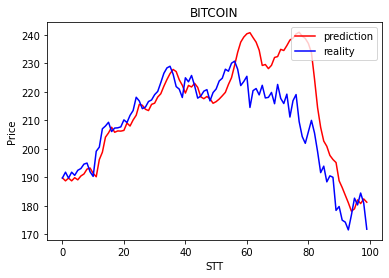

In [32]:
import matplotlib.pyplot as plt
import keras
model = keras.models.load_model('/content/driver/My Drive/LSTM_Model/lstm_test')

test_output = model.predict(x_test)

# print(test_output)
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
plt.plot(test_1[:100], color='r')
plt.plot(test_2[:100] ,color='b')
plt.title("BITCOIN")
plt.xlabel("STT")
plt.ylabel("Price")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

In [31]:
test_1 = scaler.inverse_transform(test_output)
test_2=scaler.inverse_transform(y_test)